# MACHINE LEARNING (PREDICTION)

## Chargement et traitement de données

In [ ]:
#Chargement des données
import pandas as pd
data = pd.read_csv('wfp_food_prices_civ.csv')
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2005-01-15,Montagnes,Tonkpi,Man,7.4052778,-7.5475,cereals and tubers,Maize,KG,actual,Retail,XOF,50.0,0.1016
2,2005-01-15,Vallee Du Bandama,Gbêke,Bouake,7.6833333,-5.0330556,cereals and tubers,Maize,KG,actual,Retail,XOF,125.0,0.254
3,2005-02-15,Montagnes,Tonkpi,Man,7.4052778,-7.5475,cereals and tubers,Maize,KG,actual,Retail,XOF,90.0,0.1854
4,2005-02-15,Vallee Du Bandama,Gbêke,Bouake,7.6833333,-5.0330556,cereals and tubers,Maize,KG,actual,Retail,XOF,112.5,0.2317


In [ ]:
# Suppression de la première ligne
data = data.drop(index=0).reset_index(drop=True)

In [ ]:
# Information sur les données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       9517 non-null   object
 1   admin1     9517 non-null   object
 2   admin2     9517 non-null   object
 3   market     9517 non-null   object
 4   latitude   9517 non-null   object
 5   longitude  9517 non-null   object
 6   category   9517 non-null   object
 7   commodity  9517 non-null   object
 8   unit       9517 non-null   object
 9   priceflag  9517 non-null   object
 10  pricetype  9517 non-null   object
 11  currency   9517 non-null   object
 12  price      9517 non-null   object
 13  usdprice   9517 non-null   object
dtypes: object(14)
memory usage: 1.0+ MB
None


In [ ]:
# Convertir la colonne 'date' en type datetime
data['date'] = pd.to_datetime(data['date'])
# Convertir des colonnes numériques
data['latitude'] = pd.to_numeric(data['latitude'])
data['longitude'] = pd.to_numeric(data['longitude'])
data['price'] = pd.to_numeric(data['price'])
data['usdprice'] = pd.to_numeric(data['usdprice'])

In [ ]:
#Afficher les valeurs manquantes
print(data.isnull().sum())

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


In [ ]:
#Rennomer les variables admin1 et admin2
data = data.rename(columns={'admin1': 'district', 'admin2': 'region'})

In [ ]:
# extraction des composants temporels
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [ ]:
# Description rapide des données
data.describe()

,date,latitude,longitude,price,usdprice
count,9517,9517.000000,9517.000000,9517.000000,9517.000000
mean,2016-05-21 12:28:58.531049728,7.785881,-6.067262,802.994571,1.469136
min,2005-01-15 00:00:00,5.360000,-8.159722,35.000000,0.074200
25%,2012-09-15 00:00:00,6.738056,-7.485833,287.500000,0.534700
50%,2015-12-15 00:00:00,7.405278,-5.630920,400.000000,0.757800
75%,2020-07-15 00:00:00,9.458869,-5.100000,1000.000000,1.958800
max,2024-05-15 00:00:00,9.968007,-3.496389,5890.620000,8.825400
std,NaN,1.461289,1.323884,848.560890,1.523793


## Analyse exploratoire des données

### Evolution du prix en fonction du temps

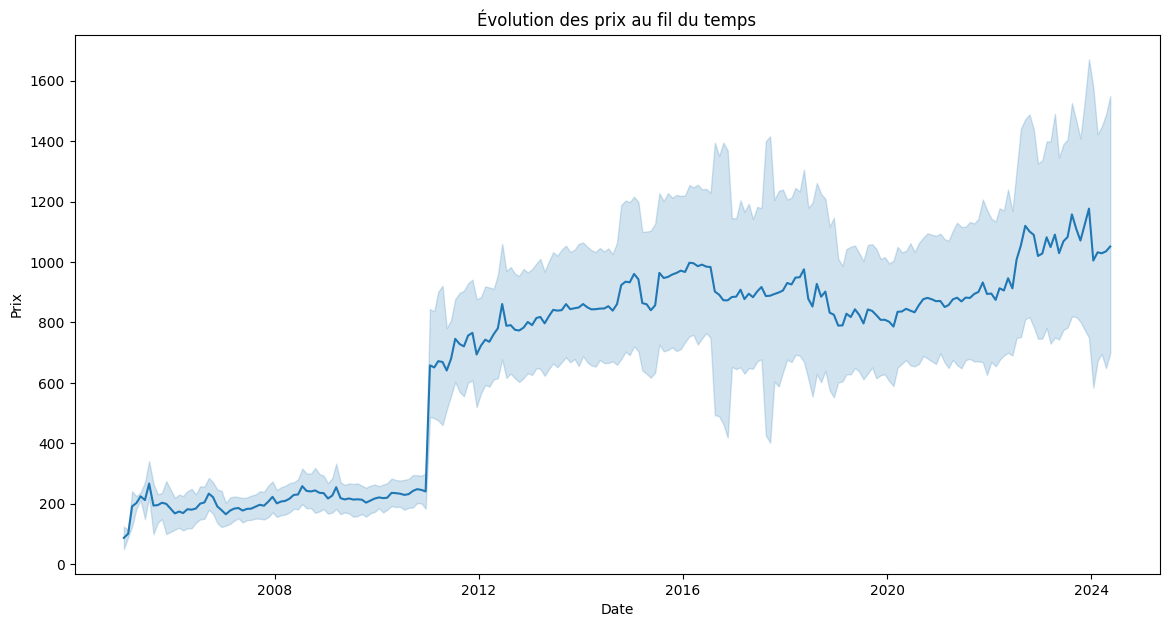

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Évolution des prix au fil du temps
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='date', y='price')
plt.title('Évolution des prix au fil du temps')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

### Analyse Univariée

#### Variables quantitatives

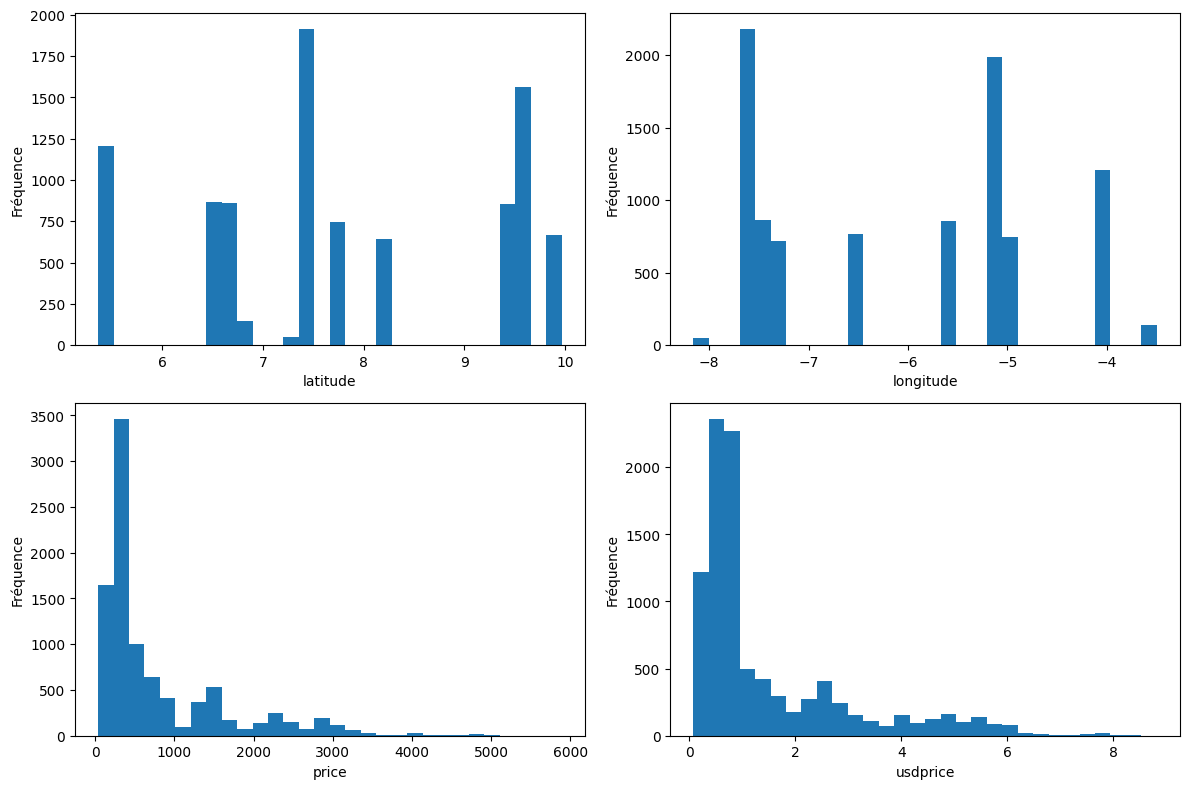

In [ ]:
# Description univariée des variables numériques
# Sélection des variables quantitatives
quant_vars = data.select_dtypes(include=np.number).columns

# Histogramme
# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].hist(data[var], bins=30)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()

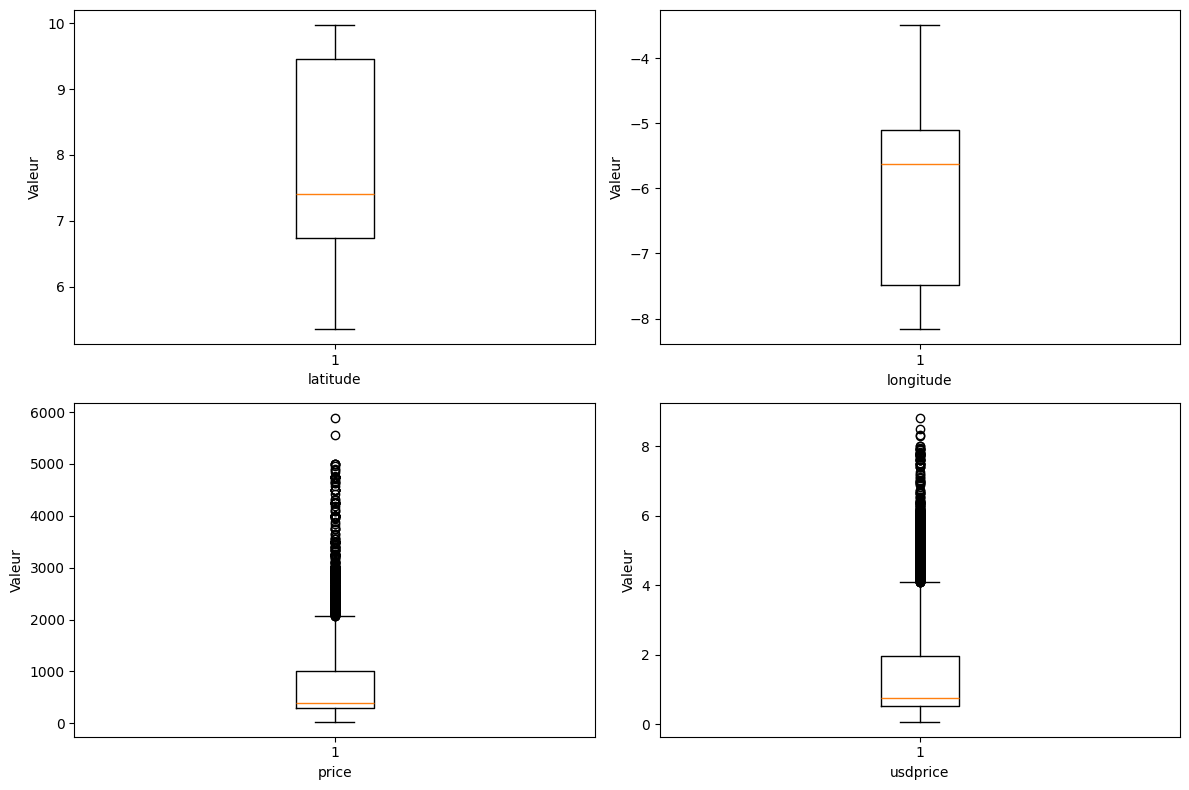

In [ ]:
# Boxplot
# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].boxplot(data[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

In [ ]:
# Analyse des valeurs aberrantes
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Trouver les outliers pour la colonne 'price'
outliers = detect_outliers_iqr(data, 'price')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

Outliers détectés:
           date           district      region          market  latitude  \
1004 2011-01-15  Vallee Du Bandama       Gbêke          Bouake  7.683333   
1018 2011-02-15           Denguele  Kabadougou         Odienne  9.510000   
1030 2011-02-15          Montagnes      Tonkpi             Man  7.405278   
1046 2011-02-15  Vallee Du Bandama       Gbêke          Bouake  7.683333   
1058 2011-02-15  Vallee Du Bandama      Hambol         Katiola  8.133333   
...         ...                ...         ...             ...       ...   
9472 2024-04-15            Savanes    Tchologo  Ferkessedougou  9.594814   
9483 2024-04-15            Savanes    Tchologo  Ouangolodougou  9.968007   
9493 2024-05-15            Savanes        Poro         Korhogo  9.458869   
9502 2024-05-15            Savanes    Tchologo  Ferkessedougou  9.594814   
9513 2024-05-15            Savanes    Tchologo  Ouangolodougou  9.968007   

      longitude             category   commodity unit  priceflag pri

#### Variables qualitatives

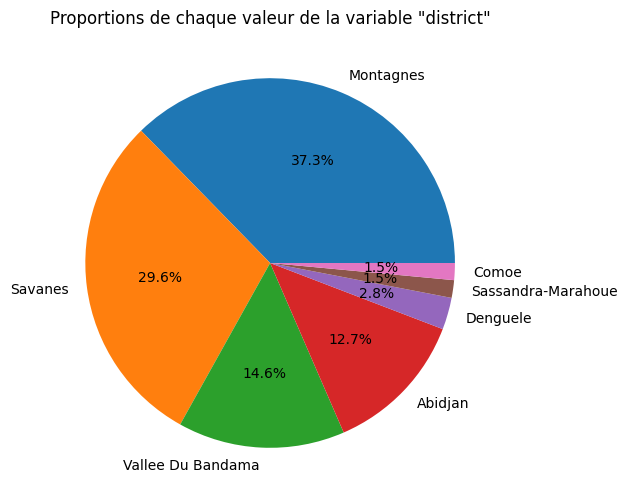

In [ ]:
#Description de la variable district
# Calcul des proportions pour chaque valeur de la variable
prop_counts = data['district'].value_counts(normalize=True)

# Création du pie chart
plt.figure(figsize=(10, 6))
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('Proportions de chaque valeur de la variable "district"')
plt.show()

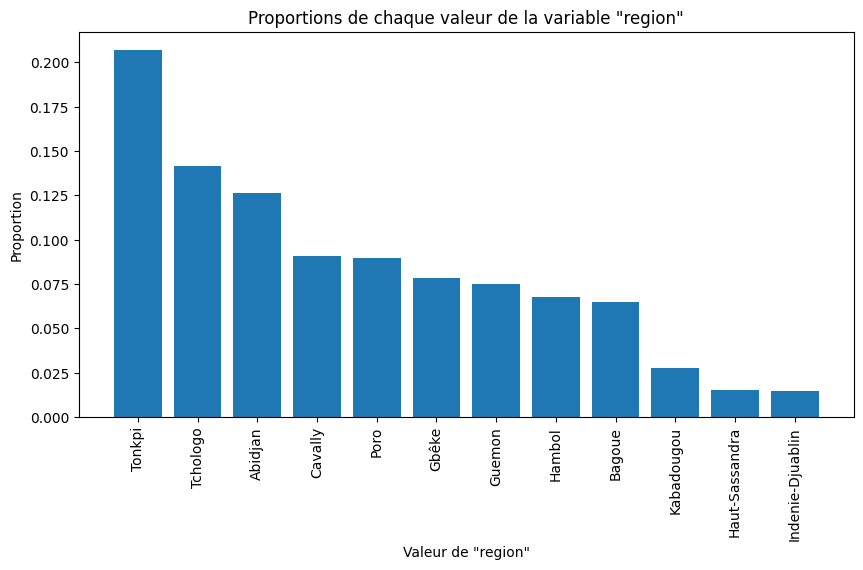

In [ ]:
#Description de la variable region
# Calcul des proportions pour chaque valeur de la variable
prop_counts = data['region'].value_counts(normalize=True)

# Création du barplot
plt.figure(figsize=(10, 5))
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=90)
plt.xlabel('Valeur de "region"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "region"')
plt.show()

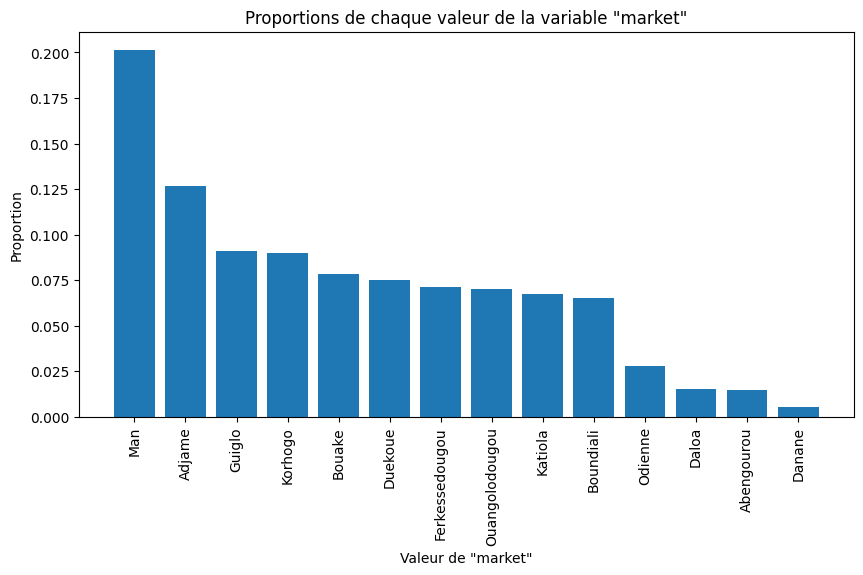

In [ ]:
#Description de la variable market
# Calcul des proportions pour chaque valeur de la variable
prop_counts = data['market'].value_counts(normalize=True)

# Création du barplot
plt.figure(figsize=(10, 5))
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=90)
plt.xlabel('Valeur de "market"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "market"')
plt.show()

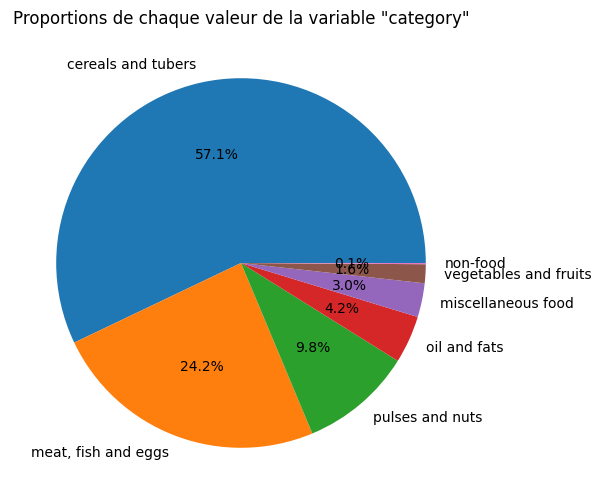

In [ ]:
#Description de la variable category
# Calcul des proportions pour chaque valeur de la variable
prop_counts = data['category'].value_counts(normalize=True)

# Création du pie chart
plt.figure(figsize=(10, 6))
plt.pie(prop_counts, labels=prop_counts.index, autopct='%1.1f%%')
plt.title('Proportions de chaque valeur de la variable "category"')
plt.show()

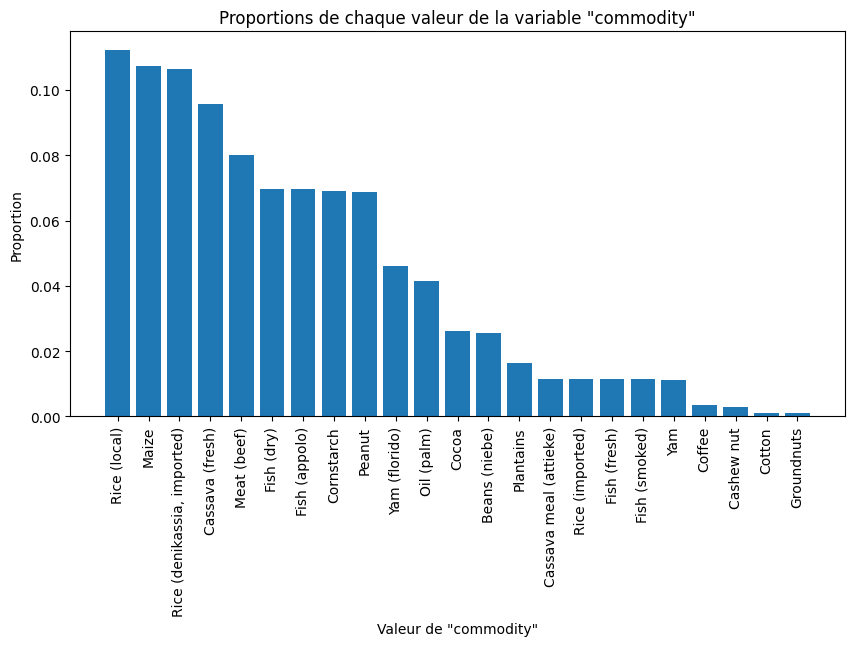

In [ ]:
#Description de la variable commodity
# Calcul des proportions pour chaque valeur de la variable catégorielle
prop_counts = data['commodity'].value_counts(normalize=True)

# Création du barplot
plt.figure(figsize=(10, 5))
plt.bar(x=prop_counts.index, height=prop_counts)
plt.xticks(rotation=90)
plt.xlabel('Valeur de "commodity"')
plt.ylabel('Proportion')
plt.title('Proportions de chaque valeur de la variable "commodity"')
plt.show()

### Analyse Bivariées

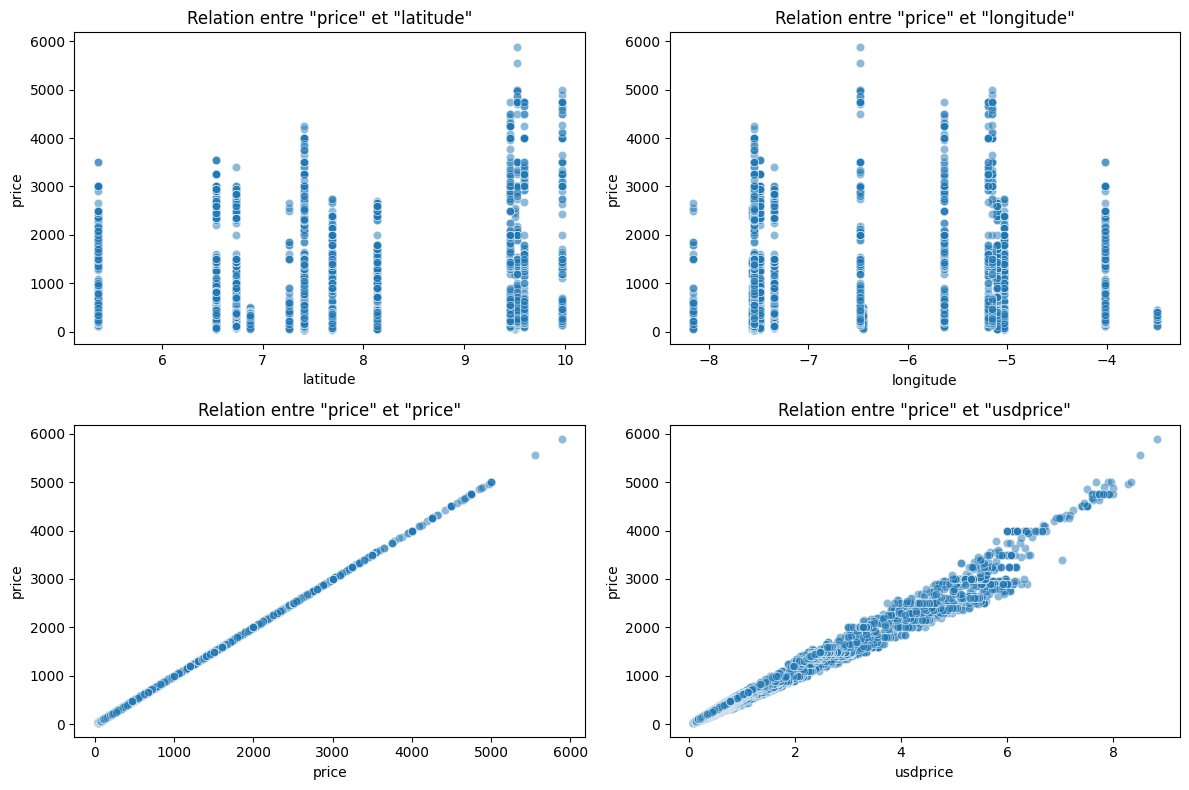

In [ ]:
# Scatterplot
# Sélection des variables numériques
num_vars = data.select_dtypes(include=np.number).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 2
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='price', data=data, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "price" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()


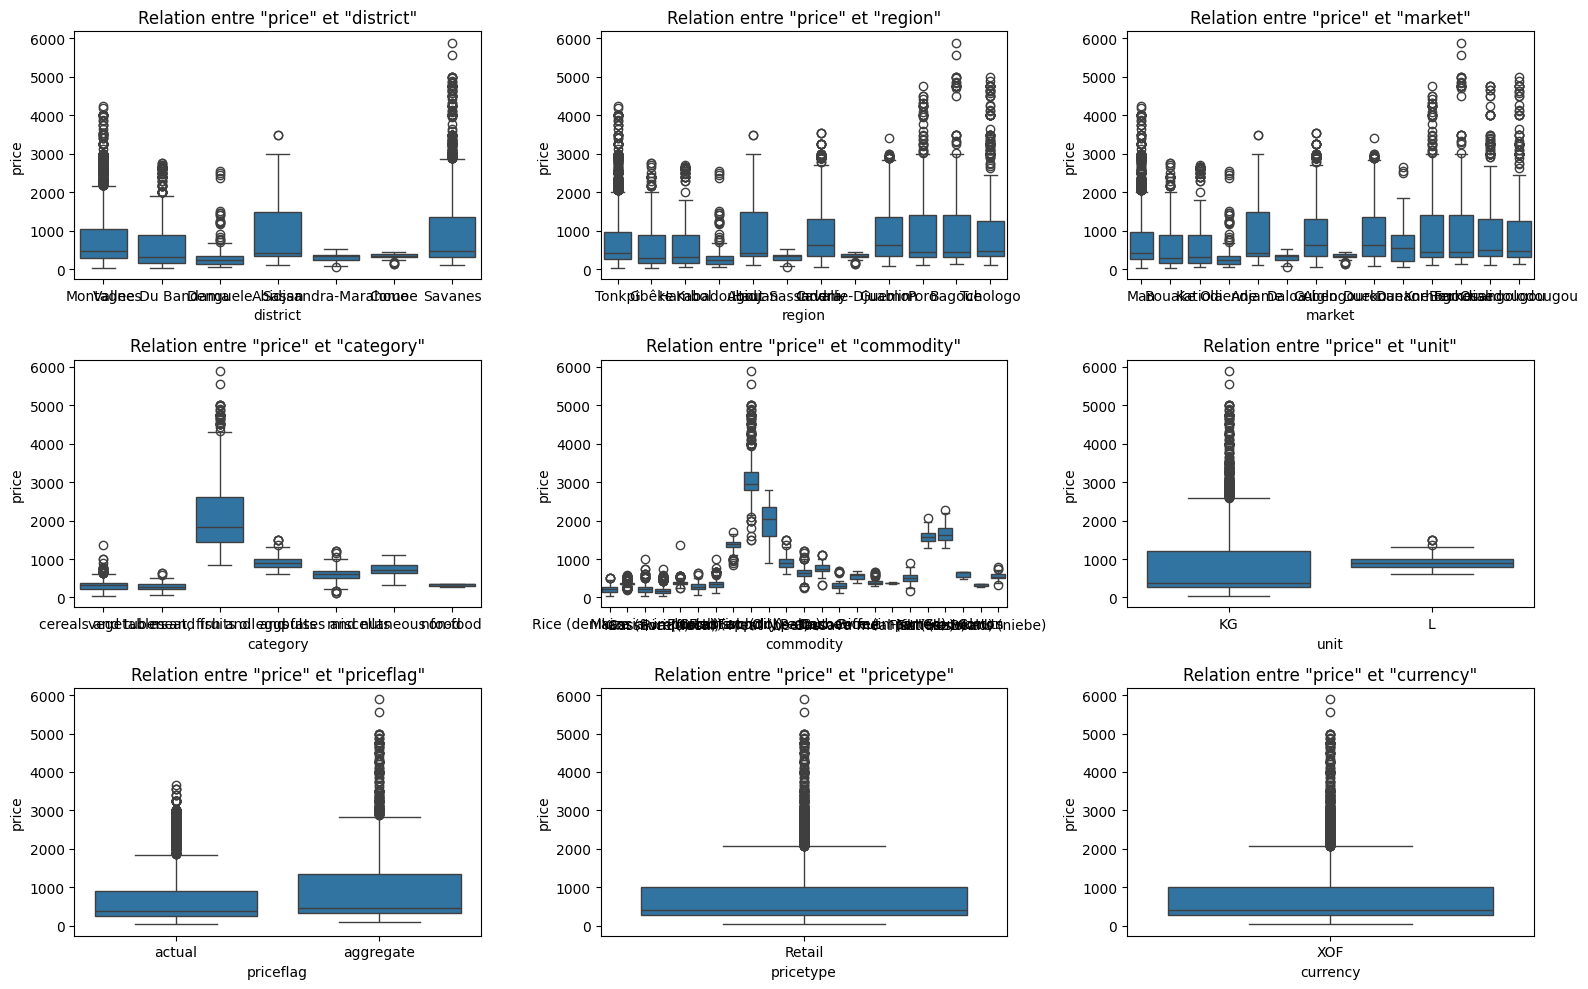

In [ ]:
#Relation entre le prix et les variables catégorielle
# Sélection des variables catégorielle
qual_vars = data.select_dtypes(include='object').columns

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axs = axs.flatten()
for i, var in enumerate(qual_vars):
    sns.boxplot(x=var, y='price', data=data, ax=axs[i])
    axs[i].set_title('Relation entre "price" et "{}"'.format(var))
plt.tight_layout()
plt.show()

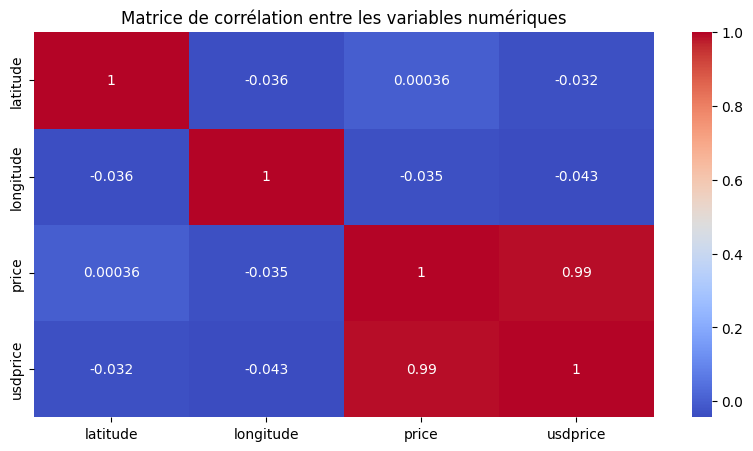

In [ ]:
# Heatmap de corrélation
#Relation entre le prix et les autres variables numériques
# Corrélation entre les variables numériques
plt.figure(figsize=(10, 5))
corr_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

## Préparation des données pour la création du modèle

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Labélisation des variables catégorielles
cat_vars = ['category','commodity']
# Appliquer le label encoding sur chaque colonne qualitative
for var in cat_vars:
    # Initialiser le label encoder
    label_encoder = LabelEncoder()
    data[var + '_Label'] = label_encoder.fit_transform(data[var])

## MODELISATION

In [ ]:
# Selection des variables pour le modèle
model_data = data[['year','category_Label','commodity_Label','price']]
model_data.head()

,year,category_Label,commodity_Label,price
0,2005,0,13,50.0
1,2005,0,13,125.0
2,2005,0,13,90.0
3,2005,0,13,112.5
4,2005,0,13,125.0


In [ ]:
#Importation de bibliothèque pour la création du modèle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

In [ ]:
# Séparation des données en variables explicatives et variable cible
X = model_data.drop('price', axis=1)
y = model_data['price']

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modèle de prédiction

In [ ]:
# Initialisation et entraînement des différents modèles
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Explained Variance Score': evs}
    print(f"{name} Results: R-squared = {r2:.4f}, MSE = {mse:.4f}, EVS = {evs:.4f}")



Linear Regression Results: R-squared = 0.0625, MSE = 636273.9582, EVS = 0.0633
Decision Tree Results: R-squared = 0.9704, MSE = 20087.9717, EVS = 0.9704
Support Vector Machine Results: R-squared = -0.2190, MSE = 827319.9566, EVS = 0.0000
K-Nearest Neighbors Results: R-squared = 0.9640, MSE = 24410.7380, EVS = 0.9640


#### Randomforest

modèle optimisé par la validation croisée

In [ ]:
#Recherche des hyperparamètres (recherche par grille)
# Définir les paramètres à tester
param_grid = {
    'n_estimators': [100, 500],
     'max_depth': [None, 5 ,10]
}

# Créer un modèle de forêt aléatoire de régression
model = RandomForestRegressor(random_state=42)

# Recherche par grille pour optimiser les paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)

Meilleurs paramètres :  {'max_depth': 10, 'n_estimators': 500}


In [ ]:
# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [ ]:
#Evaluation de performance du modèle
# Calcul des métriques d'évaluation
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)

# Création du tableau de résultats
evaluation_table = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'Score expliqué'],
    'Ensemble de test': [r2, mse, evs]
})
# Affichage du tableau de résultats
print(evaluation_table)

         Métrique  Ensemble de test
0              R²          0.970472
1             MSE      20039.688001
2  Score expliqué          0.970489


          Variable  Importance
1   category_Label    0.796059
2  commodity_Label    0.163654
0             year    0.040287


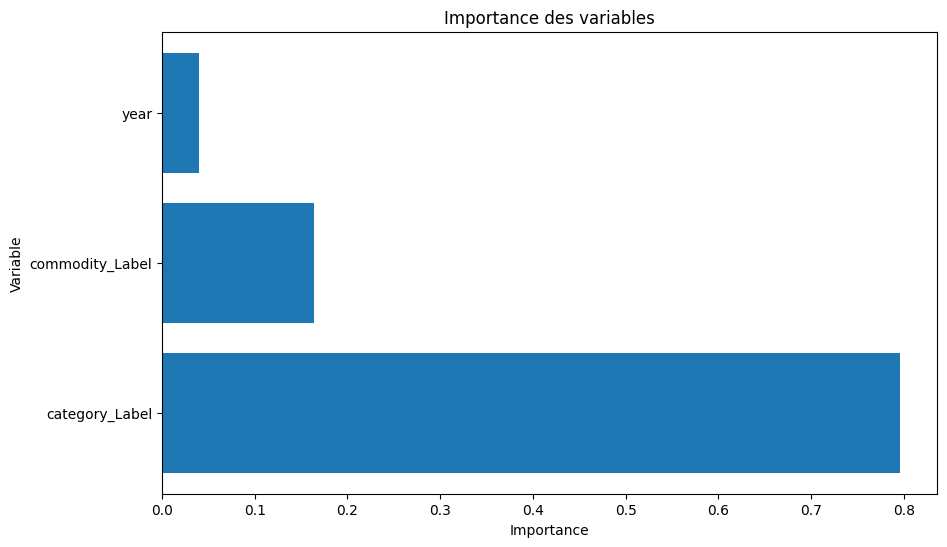

In [ ]:
# Obtenir l'importance des variables
importance = best_model.feature_importances_

# Création du tableau d'importance des variables
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importance
})

# Tri des variables par ordre d'importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage du tableau d'importance des variables
print(importance_df)

# Graphique d'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.show()

**Fin du Notebook**